In [55]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
url="https://raw.githubusercontent.com/ashishpatel26/Titanic-Machine-Learning-from-Disaster/master/input/train.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')),na_values=["NA"])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
data.shape

(891, 12)

In [24]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [29]:
data["Survived"].count()

891

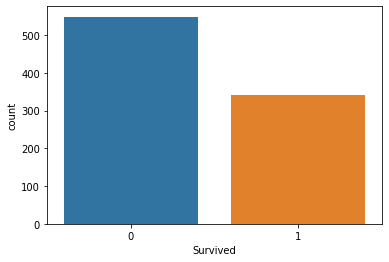

In [30]:
sns.countplot(x=data["Survived"])

In [34]:
data["Cabin"].str.split()

0         NaN
1       [C85]
2         NaN
3      [C123]
4         NaN
        ...  
886       NaN
887     [B42]
888       NaN
889    [C148]
890       NaN
Name: Cabin, Length: 891, dtype: object

In [56]:
import re
data["Cabin"]=data["Cabin"].astype(str)
data["Deck"]=data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())

In [57]:
data["Deck"]=data["Deck"].fillna("U0")


In [58]:
data.loc[data["Deck"]=="nan","Deck"]="UO"

In [59]:
data["Age"]=data["Age"].fillna(data["Age"].mean())

In [29]:
data.groupby("Embarked").size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [60]:
data["Embarked"]=data["Embarked"].fillna("Q")

In [61]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Deck           0
dtype: int64

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 1080x1080 with 0 Axes>

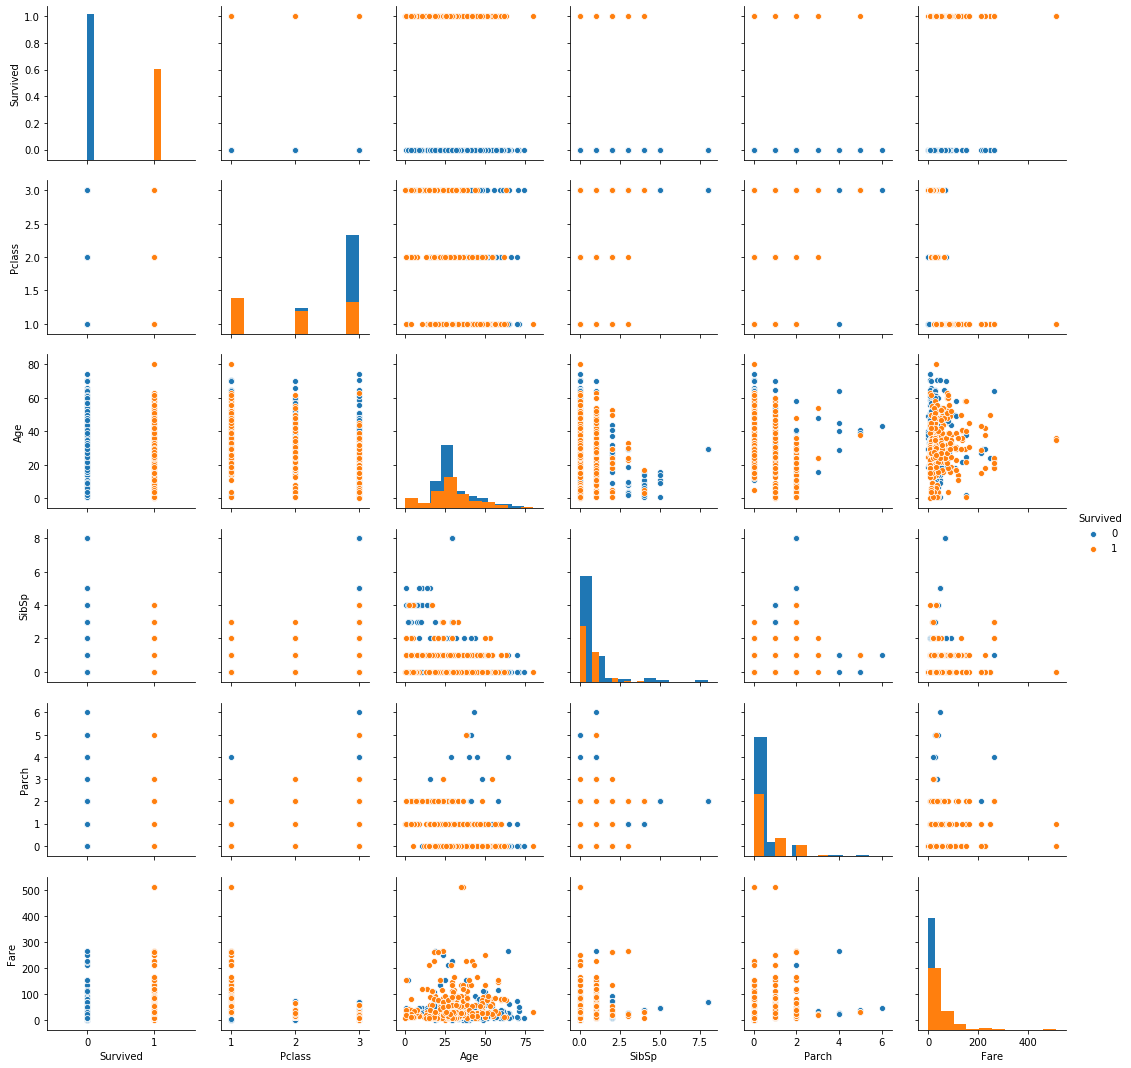

In [94]:
plt.figure(figsize=(15,15))

sns.pairplot(data._get_numeric_data().drop(columns=["PassengerId"]),diag_kind="hist",hue="Survived")
plt.show()

In [102]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Deck'],
      dtype='object')

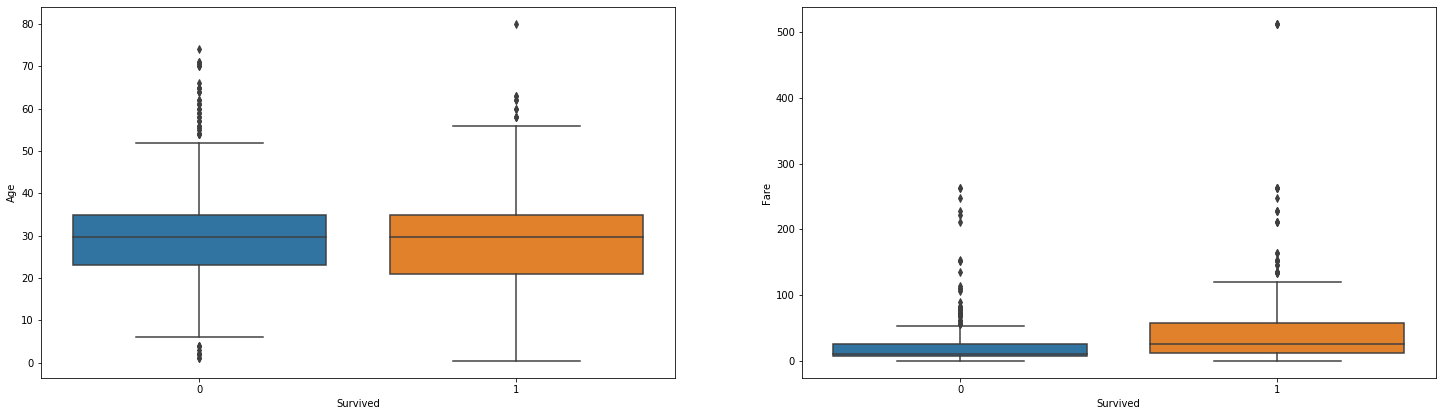

In [103]:
plt.figure(figsize=(25, 15))
for column_index, column in enumerate(data[["Age","Fare"]].columns):
    if column=="Survived":
        continue
    plt.subplot(2, 2, column_index + 1)
    sns.boxplot(x='Survived', y=column, data=data)

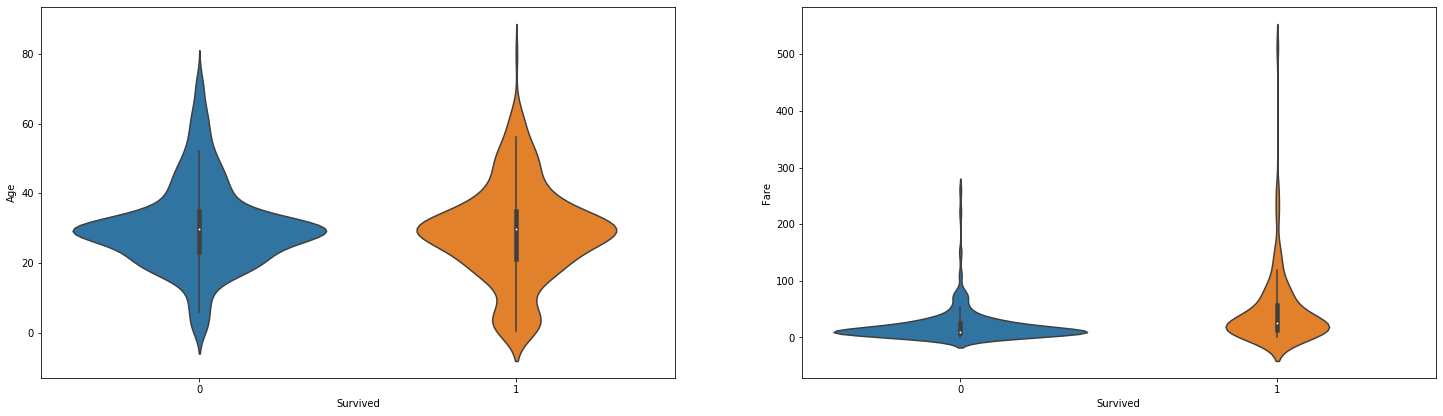

In [104]:
plt.figure(figsize=(25, 15))
for column_index, column in enumerate(data[["Age","Fare"]].columns):
    if column=="Survived":
        continue
    plt.subplot(2, 2, column_index + 1)
    sns.violinplot(x='Survived', y=column, data=data)

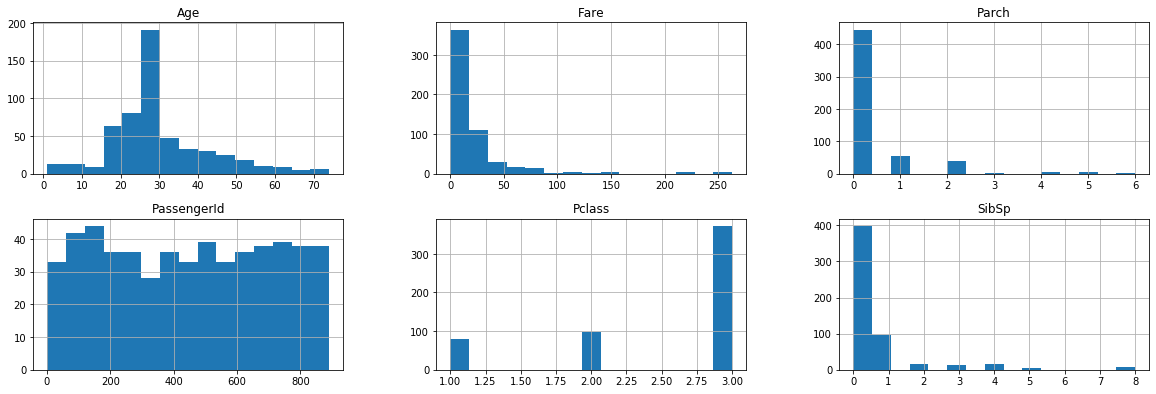

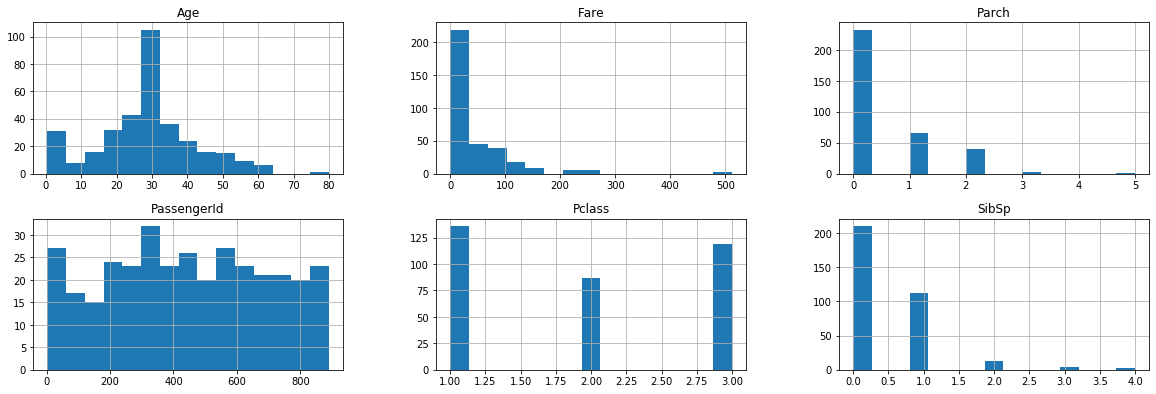

In [114]:
data.groupby("Survived").hist(bins=15, figsize=(20, 10), layout=(3, 3))
plt.show()

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

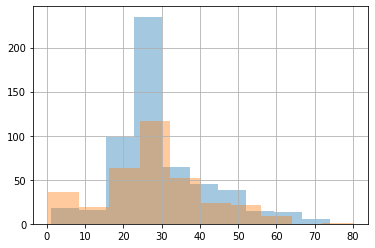

In [113]:
data.groupby("Survived").Age.hist(alpha=0.4)

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

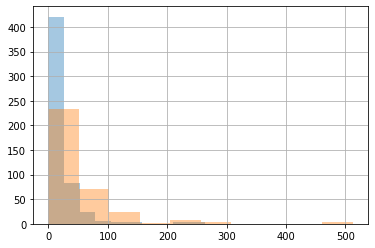

In [120]:
data.groupby("Survived").Fare.hist(alpha=0.4)

In [32]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Deck'],
      dtype='object')

In [33]:
data["Ticket"].unique().size

681

In [62]:
data=data.drop(columns=["PassengerId","Name","Ticket"])
data=data.drop(columns=["Cabin"])
data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,male,22.0,1,0,7.2500,S,UO
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,UO
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,UO


In [41]:
# sex={"male":0,"female":1}
# data["Sex"]=data["Sex"].map(sex)

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [66]:
data[["Sex","Embarked","Deck"]]=data[["Sex","Embarked","Deck"]].apply(le.fit_transform)

In [102]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,1,22,1,0,7,2,8
1,1,1,0,38,1,0,71,0,2
2,1,3,0,26,0,0,7,2,8
3,1,1,0,35,1,0,53,2,2
4,0,3,1,35,0,0,8,2,8


In [68]:
data["Age"]=data["Age"].astype(int)
data["Fare"]=data["Fare"].astype(int)

In [69]:
y=data["Survived"]
X=data.iloc[:,1:]

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
def evaluate_model(X, y, model):
# define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) # define the model evaluation the metric
    metric = make_scorer(accuracy_score)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1) 
    return scores

In [82]:
from sklearn.dummy import DummyClassifier
from numpy import mean
from numpy import std
model = DummyClassifier(strategy='uniform')
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean G-mean: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean G-mean: 0.503 (0.053)


In [117]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

def get_models():
    models, names = list(), list()
    # LR
    models.append(LogisticRegression(solver='lbfgs')) 
    names.append('LR')
    
    models.append(LinearDiscriminantAnalysis())
    names.append("LDA")
    
    models.append(KNeighborsClassifier())
    names.append("KNN")
    # SVM
    models.append(SVC(gamma='scale'))
    names.append('SVM')
    
    # RF 
#     models.append(RandomForestClassifier(n_estimators=1000)) 
#     names.append('RF')
    
    return models, names

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier



models, names = get_models() 
results = list()
# evaluate each model
for i in range(len(models)):
  # evaluate the model and store results
    scores = evaluate_model(X, y, models[i])
    results.append(scores)
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

>LR 0.792 (0.035)
>LDA 0.796 (0.042)
>KNN 0.719 (0.037)
>SVM 0.679 (0.034)
>RF 0.811 (0.036)


In [108]:
ensemble1

VotingClassifier(estimators=[LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                             LinearDiscriminantAnalysis(n_components=None,
                                                        priors=None,
                                                        shrinkage=None,
                                                        solver='svd',...
                                                    criterion='gini',
                         

In [111]:
from sklearn.model_selection import KFold
models=[]
from sklearn.metrics import accuracy_score
scoring="accuracy"
num_folds=7
seed=7
models.append(("LR",LogisticRegression(solver="liblinear")))
models.append(("LDA",LinearDiscriminantAnalysis()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("SVM",SVC(gamma="auto")))
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_result=cross_val_score(model,X,y,cv=kfold,scoring=scoring)
    results.append(cv_result)
    names.append(name)
    msg= "%s: %f (%f)" % (name,cv_result.mean(),cv_result.std())
    print (msg)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

LR: 0.794616 (0.024256)
LDA: 0.794590 (0.025197)
KNN: 0.699267 (0.039148)
SVM: 0.700436 (0.055666)


In [115]:
ensemble1

VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('LDA',
                              LinearDiscriminantAnalysis(n_components=None,
                                                         priors=None,
                                                         shrinkage=...
                                

In [119]:
ensemble1

VotingClassifier(estimators=[LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                             LinearDiscriminantAnalysis(n_components=None,
                                                        priors=None,
                                                        shrinkage=None,
                                                        solver='svd',...
                                                  metric_params=None,
                         

In [118]:
models, names = get_models() 
from sklearn.ensemble import VotingClassifier
ensemble1 = VotingClassifier(models)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) # define the model evaluation the metric
metric = make_scorer(accuracy_score)
    # evaluate model
scores = cross_val_score(ensemble1, X, y, scoring=metric, cv=cv, n_jobs=-1) 

    # summarize and store
print('>%s %.3f (%.3f)' % ("ensemble", mean(scores), std(scores)))

>ensemble nan (nan)


In [116]:
from sklearn.ensemble import VotingClassifier
ensemble1 = VotingClassifier(models)
results = cross_val_score(ensemble1, X, y, cv=cv)
print(results.mean())

0.7725301706200581


In [86]:
def get_models():
    models, names = list(), list()
    # RandomOverSampler 
    models.append(RandomOverSampler()) 
    names.append('ROS')
    # SMOTE
    models.append(SMOTE()) 
    names.append('SMOTE')
    # BorderlineSMOTE 
    models.append(BorderlineSMOTE()) 
    names.append('BLSMOTE')
    # SVMSMOTE 
    models.append(SVMSMOTE()) 
    names.append('SVMSMOTE')
    # ADASYN
    models.append(ADASYN()) 
    names.append('ADASYN')
    return models, names

In [89]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline

models, names = get_models() 
results = list()
# evaluate each model
for i in range(len(models)):
  # define the model
    #model = BaggingClassifier(n_estimators=1000)
    model=SVC(gamma='scale', class_weight='balanced')
      # define the pipeline steps
    steps = [('s', MinMaxScaler()), ('o', models[i]), ('m', model)] # define the pipeline
    pipeline = Pipeline(steps=steps)
    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

>ROS 0.796 (0.041)
>SMOTE 0.801 (0.036)
>BLSMOTE 0.780 (0.038)
>SVMSMOTE 0.780 (0.034)
>ADASYN 0.780 (0.039)


In [76]:
from sklearn.preprocessing import PowerTransformer
def get_models():
    models, names = list(), list()
    # LR
    models.append(LogisticRegression(solver='lbfgs', class_weight='balanced')) 
    names.append('LR')
    # SVM
    models.append(SVC(gamma='scale', class_weight='balanced')) 
    names.append('SVM')
    # RF
    models.append(RandomForestClassifier(n_estimators=1000)) 
    names.append('RF')
    return models, names
models, names = get_models() 
results = list()
# evaluate each model
for i in range(len(models)):
  # defines pipeline steps
    steps = [('p', PowerTransformer()), ('m',models[i])] # define pipeline
    pipeline = Pipeline(steps=steps)
    # evaluate the pipeline and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

>LR 0.783 (0.040)
>SVM 0.807 (0.040)
>RF 0.808 (0.039)
